# EDA: FAERS and Approvals Data

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns

pd.set_option('display.max_columns', None)
path = 'full_data_inner.csv'
adverse_approvals = pd.read_csv(path)
adverse_approvals.head()

/Users/yosha/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9,21,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,utilization_type,state,labeler_code,product_code,package_size,year,quarter,product_name,suppression_used,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,medicaid_amount_reimbursed,non_medicaid_amount_reimbursed,quarter_begin,quarter_begin_date,latitude,longitude,location,ndc,supression_used,NDA,Approval Date,Drug Name,Submission,Active Ingredients,Company,Submission Classification *,Submission Status,year_y,month,adverse_affects,dosage,drug_id
0,0,MCOU,NJ,75987.0,40.0,5.0,2017,4,Pennsaid,False,50.000,47.0,106421.25,106421.25,0.0,10/1,10/01/2017 12:00:00 AM,41.1289,-98.2883,"(41.1289, -98.2883)",7.598700e+10,NaN,NDA204623,1/16/2014,PENNSAID,ORIG-1,DICLOFENAC SODIUM,HORIZON,Type 3 - New Dosage Form,Approval,2014,1,56,None,204623
1,1,MCOU,VA,75987.0,40.0,5.0,2017,4,PENNSAID,False,36.000,36.0,79721.78,79721.78,0.0,10/1,10/01/2017 12:00:00 AM,35.7449,-86.7489,"(35.7449, -86.7489)",7.598700e+10,NaN,NDA204623,1/16/2014,PENNSAID,ORIG-1,DICLOFENAC SODIUM,HORIZON,Type 3 - New Dosage Form,Approval,2014,1,56,None,204623
2,2,MCOU,KY,75987.0,40.0,5.0,2017,4,PENNSAID,False,29.000,28.0,65809.14,65809.14,0.0,10/1,10/01/2017 12:00:00 AM,38.5111,-96.8005,"(38.5111, -96.8005)",7.598700e+10,NaN,NDA204623,1/16/2014,PENNSAID,ORIG-1,DICLOFENAC SODIUM,HORIZON,Type 3 - New Dosage Form,Approval,2014,1,56,None,204623
3,3,MCOU,NY,75987.0,40.0,5.0,2017,4,PENNSAID,False,713.893,709.0,1582684.15,1582684.15,0.0,10/1,10/01/2017 12:00:00 AM,34.8375,-106.2371,"(34.8375, -106.2371)",7.598700e+10,NaN,NDA204623,1/16/2014,PENNSAID,ORIG-1,DICLOFENAC SODIUM,HORIZON,Type 3 - New Dosage Form,Approval,2014,1,56,None,204623
4,4,MCOU,NV,75987.0,40.0,5.0,2017,4,Pennsaid,False,22.000,17.0,49960.27,49960.27,0.0,10/1,10/01/2017 12:00:00 AM,40.3140,-74.5089,"(40.314, -74.5089)",7.598700e+10,NaN,NDA204623,1/16/2014,PENNSAID,ORIG-1,DICLOFENAC SODIUM,HORIZON,Type 3 - New Dosage Form,Approval,2014,1,56,None,204623


In [2]:
adverse_approvals = adverse_approvals[adverse_approvals["units_reimbursed"] >= adverse_approvals["adverse_affects"]]
adverse_approvals["adverse_affects_rate"] = adverse_approvals["adverse_affects"]/adverse_approvals["units_reimbursed"]

## Rate of Adverse Effects by Company

In [3]:
company_adverse_effects = adverse_approvals.groupby(['Company'])['adverse_affects_rate'].mean().sort_values(ascending=False)
normalized = company_adverse_effects#*100/(company_adverse_effects.sum())
normalized

Company
CENTOCOR ORTHO BIOTECH INC    0.914713
PRAGMA                        0.874627
BIOGEN IDEC INC               0.851405
ALNYLAM PHARMS INC            0.813427
MORPHOSYS US INC              0.793404
                                ...   
CARLSBAD TECHNOLOGY           0.000093
NANG KUANG PHARM CO           0.000081
PARKE-DAVIS                   0.000075
ANDA REPOSITORY               0.000051
OUTLOOK PHARMS                0.000033
Name: adverse_affects_rate, Length: 739, dtype: float64

<AxesSubplot:>

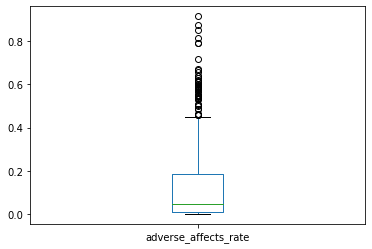

In [4]:
normalized.plot.box()

/Users/yosha/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


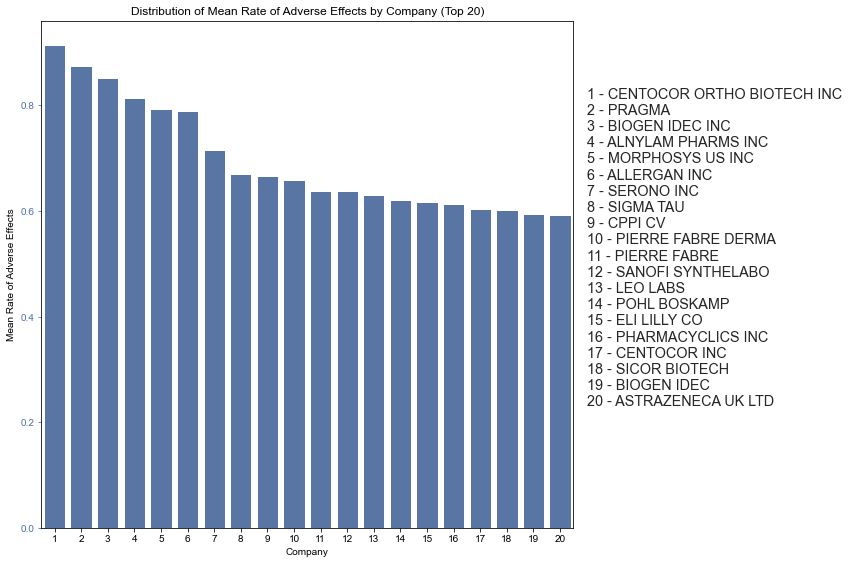

In [5]:
normalized_top_20 = normalized.to_frame()[:20]
fig, ax = plt.subplots(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.barplot(normalized_top_20.index, normalized_top_20["adverse_affects_rate"], color="C0")

#ax2 = ax.twinx()
#ax2.plot(normalized.index, normalized["units_reimbursed"], color="C1", marker="D", ms=7)
#ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
#ax2.tick_params(axis="y", colors="C1")
#ax.tick_params(axis="x",rotation=90)
ax.grid(False)
#ax2.grid(False)
ax.set_ylabel("Mean Rate of Adverse Effects")
#ax2.set_ylabel("Units Reimbursed")
ax.set_xticklabels(range(1,21))
#ax.tick_params(axis="x",rotation=90)
text = ""
for i in range(20):
    text += str(i+1) + " - " + normalized_top_20.index[i] + "\n"
ax.annotate(text=text, xy=(20, 0.2), fontsize='large', annotation_clip=False)
ax.set_title("Distribution of Mean Rate of Adverse Effects by Company (Top 20)")
plt.tight_layout()
plt.show()
#plt.savefig("./EDA/Company_Pareto")

## Rate of Adverse Effects by Active Ingredient

In [6]:
adverse_approvals = pd.concat([adverse_approvals, adverse_approvals["Active Ingredients"].str.split(";", expand=True)], axis=1)
adverse_approvals.head()

,Unnamed: 0,utilization_type,state,labeler_code,product_code,package_size,year,quarter,product_name,suppression_used,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,medicaid_amount_reimbursed,non_medicaid_amount_reimbursed,quarter_begin,quarter_begin_date,latitude,longitude,location,ndc,supression_used,NDA,Approval Date,Drug Name,Submission,Active Ingredients,Company,Submission Classification *,Submission Status,year_y,month,adverse_affects,dosage,drug_id,adverse_affects_rate,0,1,2,3,4,5,6,7,8,9,10,11,12
3,3,MCOU,NY,75987.0,40.0,5.0,2017,4,PENNSAID,False,713.893,709.0,1582684.15,1582684.15,0.0,10/1,10/01/2017 12:00:00 AM,34.8375,-106.2371,"(34.8375, -106.2371)",7.598700e+10,NaN,NDA204623,1/16/2014,PENNSAID,ORIG-1,DICLOFENAC SODIUM,HORIZON,Type 3 - New Dosage Form,Approval,2014,1,56,None,204623,0.078443,DICLOFENAC SODIUM,None,None,None,None,None,None,None,None,None,None,None,None
8,8,MCOU,NY,75987.0,40.0,5.0,2017,4,PENNSAID,False,713.893,709.0,1582684.15,1582684.15,0.0,10/1,10/01/2017 12:00:00 AM,34.8375,-106.2371,"(34.8375, -106.2371)",7.598700e+10,NaN,NDA204623,1/16/2014,PENNSAID,ORIG-1,DICLOFENAC SODIUM,HORIZON,Type 3 - New Dosage Form,Approval,2014,1,56,None,204623,0.078443,DICLOFENAC SODIUM,None,None,None,None,None,None,None,None,None,None,None,None
10,10,MCOU,TX,75987.0,40.0,5.0,2017,3,PENNSAID 2,False,264.000,260.0,592471.63,592471.63,0.0,7/1,07/01/2017 12:00:00 AM,33.8191,-80.9066,"(33.8191, -80.9066)",7.598700e+10,NaN,NDA204623,1/16/2014,PENNSAID,ORIG-1,DICLOFENAC SODIUM,HORIZON,Type 3 - New Dosage Form,Approval,2014,1,69,None,204623,0.261364,DICLOFENAC SODIUM,None,None,None,None,None,None,None,None,None,None,None,None
12,12,FFSU,CO,75987.0,40.0,5.0,2017,3,PENNSAID,False,73.339,63.0,162625.76,162625.76,0.0,7/1,07/01/2017 12:00:00 AM,36.1700,-119.7462,"(36.17, -119.7462)",7.598700e+10,NaN,NDA204623,1/16/2014,PENNSAID,ORIG-1,DICLOFENAC SODIUM,HORIZON,Type 3 - New Dosage Form,Approval,2014,1,69,None,204623,0.940836,DICLOFENAC SODIUM,None,None,None,None,None,None,None,None,None,None,None,None
14,14,FFSU,NY,75987.0,40.0,5.0,2017,3,PENNSAID,False,112.000,112.0,252816.60,252816.60,0.0,7/1,07/01/2017 12:00:00 AM,34.8375,-106.2371,"(34.8375, -106.2371)",7.598700e+10,NaN,NDA204623,1/16/2014,PENNSAID,ORIG-1,DICLOFENAC SODIUM,HORIZON,Type 3 - New Dosage Form,Approval,2014,1,69,None,204623,0.616071,DICLOFENAC SODIUM,None,None,None,None,None,None,None,None,None,None,None,None


In [7]:
columns = range(13)
dict_ingredients_adverse_affects = {}
dict_ingredients_units_remimbursed = {}
for col in columns:
    temp = dict(adverse_approvals.groupby([col]).agg({'adverse_affects':'sum', 'units_reimbursed':'sum'}))#['adverse_affects'].sum().sort_values(ascending=False))
    temp_adverse_affects = dict(temp["adverse_affects"])
    temp_units_reimbursed = dict(temp["units_reimbursed"])
    dict_ingredients_adverse_affects = {k: dict_ingredients_adverse_affects.get(k, 0) + temp_adverse_affects.get(k, 0) for k in dict_ingredients_adverse_affects | temp_adverse_affects}
    dict_ingredients_units_remimbursed = {k: dict_ingredients_units_remimbursed.get(k, 0) + temp_units_reimbursed.get(k, 0) for k in dict_ingredients_units_remimbursed | temp_units_reimbursed}

dict_ingredients = {k: dict_ingredients_adverse_affects.get(k, 0) / dict_ingredients_units_remimbursed.get(k, 0) for k in dict_ingredients_adverse_affects | dict_ingredients_units_remimbursed}

In [8]:
for col in columns:
    adverse_approvals[col] = adverse_approvals[col].map(dict_ingredients,
                             na_action=None)

In [9]:
adverse_approvals.head()

,Unnamed: 0,utilization_type,state,labeler_code,product_code,package_size,year,quarter,product_name,suppression_used,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,medicaid_amount_reimbursed,non_medicaid_amount_reimbursed,quarter_begin,quarter_begin_date,latitude,longitude,location,ndc,supression_used,NDA,Approval Date,Drug Name,Submission,Active Ingredients,Company,Submission Classification *,Submission Status,year_y,month,adverse_affects,dosage,drug_id,adverse_affects_rate,0,1,2,3,4,5,6,7,8,9,10,11,12
3,3,MCOU,NY,75987.0,40.0,5.0,2017,4,PENNSAID,False,713.893,709.0,1582684.15,1582684.15,0.0,10/1,10/01/2017 12:00:00 AM,34.8375,-106.2371,"(34.8375, -106.2371)",7.598700e+10,NaN,NDA204623,1/16/2014,PENNSAID,ORIG-1,DICLOFENAC SODIUM,HORIZON,Type 3 - New Dosage Form,Approval,2014,1,56,None,204623,0.078443,0.003654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,MCOU,NY,75987.0,40.0,5.0,2017,4,PENNSAID,False,713.893,709.0,1582684.15,1582684.15,0.0,10/1,10/01/2017 12:00:00 AM,34.8375,-106.2371,"(34.8375, -106.2371)",7.598700e+10,NaN,NDA204623,1/16/2014,PENNSAID,ORIG-1,DICLOFENAC SODIUM,HORIZON,Type 3 - New Dosage Form,Approval,2014,1,56,None,204623,0.078443,0.003654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10,MCOU,TX,75987.0,40.0,5.0,2017,3,PENNSAID 2,False,264.000,260.0,592471.63,592471.63,0.0,7/1,07/01/2017 12:00:00 AM,33.8191,-80.9066,"(33.8191, -80.9066)",7.598700e+10,NaN,NDA204623,1/16/2014,PENNSAID,ORIG-1,DICLOFENAC SODIUM,HORIZON,Type 3 - New Dosage Form,Approval,2014,1,69,None,204623,0.261364,0.003654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12,FFSU,CO,75987.0,40.0,5.0,2017,3,PENNSAID,False,73.339,63.0,162625.76,162625.76,0.0,7/1,07/01/2017 12:00:00 AM,36.1700,-119.7462,"(36.17, -119.7462)",7.598700e+10,NaN,NDA204623,1/16/2014,PENNSAID,ORIG-1,DICLOFENAC SODIUM,HORIZON,Type 3 - New Dosage Form,Approval,2014,1,69,None,204623,0.940836,0.003654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,14,FFSU,NY,75987.0,40.0,5.0,2017,3,PENNSAID,False,112.000,112.0,252816.60,252816.60,0.0,7/1,07/01/2017 12:00:00 AM,34.8375,-106.2371,"(34.8375, -106.2371)",7.598700e+10,NaN,NDA204623,1/16/2014,PENNSAID,ORIG-1,DICLOFENAC SODIUM,HORIZON,Type 3 - New Dosage Form,Approval,2014,1,69,None,204623,0.616071,0.003654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ingre_sum = sorted(dict_ingredients.items(), key=lambda x: x[1], reverse=True)
ingre_sum

[('NATALIZUMAB', 0.9241770167533783),
 ('PARATHYROID HORMONE', 0.8491686460807601),
 ('PEGINTERFERON BETA-1A', 0.8490566037735849),
 ('ROMIDEPSIN', 0.8315499847141546),
 ('ABATACEPT', 0.8084053522771865),
 ('INFLIXIMAB-DYYB', 0.800886525877159),
 ('TAFASITAMAB-CXIX', 0.7934038581207218),
 ('PATISIRAN SODIUM', 0.7926088013615367),
 ('CEDAZURIDINE', 0.788235294117647),
 (' DECITABINE', 0.788235294117647),
 ('VEDOLIZUMAB', 0.7594211379240895),
 ('DEGARELIX ACETATE', 0.7553304432451562),
 ('DACTINOMYCIN', 0.7390817469204927),
 ('TRABECTEDIN', 0.7269289695863351),
 ('BUROSUMAB-TWZA', 0.6660403877721948),
 ('BENRALIZUMAB', 0.6637891148096992),
 ('PEGASPARGASE', 0.6634840806984095),
 ('NOREPINEPHRINE BITARTRATE', 0.6519607843137255),
 ('VINORELBINE TARTRATE', 0.6504552574897201),
 (' MESNA', 0.6498215259733482),
 ('USTEKINUMAB', 0.6316844634482736),
 ('INGENOL MEBUTATE', 0.6304347826086957),
 ('ECULIZUMAB', 0.6298761910670153),
 ('PENTOSTATIN', 0.6226415094339622),
 ('DALTEPARIN SODIUM', 0.61

In [11]:
ingre_sum = pd.DataFrame(ingre_sum, columns =['Active Ingredient', 'Rate of Adverse Effects'])

/Users/yosha/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


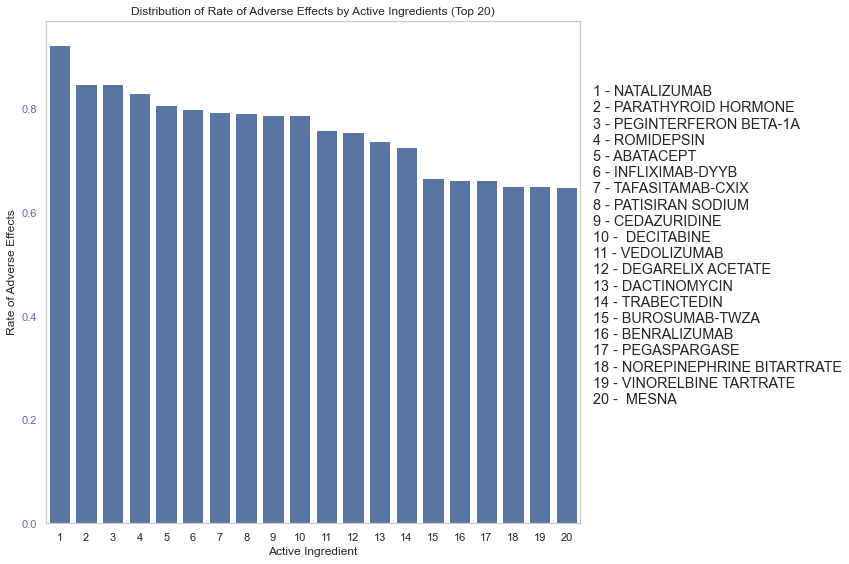

In [12]:
ingre_top_20 = ingre_sum[:20]
fig, ax = plt.subplots(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.barplot(ingre_top_20["Active Ingredient"], ingre_top_20["Rate of Adverse Effects"], color="C0")

ax.tick_params(axis="y", colors="C0")
ax.grid(False)
ax.set_ylabel("Rate of Adverse Effects")
ax.set_title("Distribution of Rate of Adverse Effects by Active Ingredients (Top 20)")
ax.set_xticklabels(range(1,21))

text = ""
for i in range(20):
    text += str(i+1) + " - " + ingre_top_20["Active Ingredient"][i] + "\n"
ax.annotate(text=text, xy=(20, 0.2), fontsize='large', annotation_clip=False)
plt.tight_layout()
plt.show()

## Years Since Approval

In [13]:
adverse_approvals["years_since_approval"] = adverse_approvals["year"]-adverse_approvals["year_y"]
years_subset = adverse_approvals[adverse_approvals["years_since_approval"]>=0]
years_subset["years_since_approval"].value_counts()

3     147732
2     144376
4     142734
1     126844
5     122820
0     119248
6     117084
7     104954
8      90062
9      78906
12     71776
14     69158
10     65378
11     62376
15     60262
13     60082
16     49568
17     36712
18     29116
19     17160
20      7972
Name: years_since_approval, dtype: int64

<AxesSubplot:title={'center':'Distribution of Dataset - Years Since Approval'}, xlabel='Years Since Approval', ylabel='Number of Data Points'>

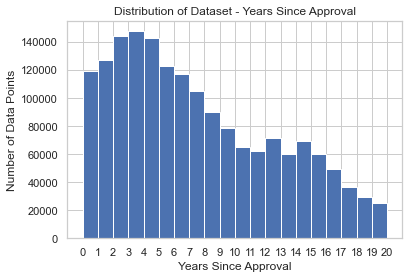

In [14]:
plt.xticks(range(21))
plt.ylabel("Number of Data Points")
plt.xlabel("Years Since Approval")
plt.title("Distribution of Dataset - Years Since Approval")
years_subset["years_since_approval"].hist(bins=20)

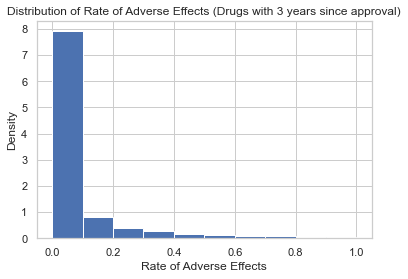

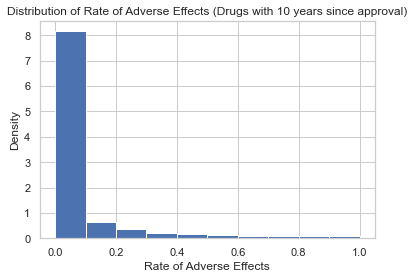

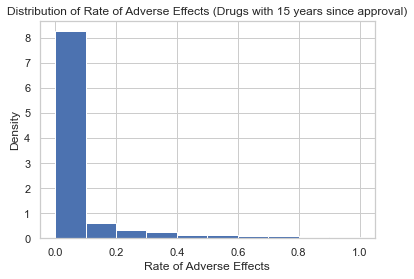

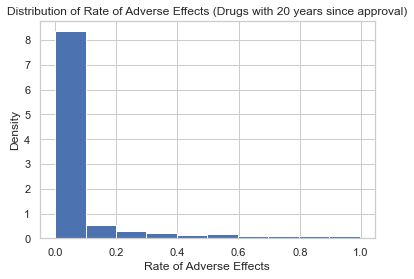

In [15]:
years_3 = years_subset[years_subset["years_since_approval"]==3]
plt.ylabel("Density")
plt.xlabel("Rate of Adverse Effects")
plt.title("Distribution of Rate of Adverse Effects (Drugs with 3 years since approval)")
years_3["adverse_affects_rate"].hist(bins=10, density=True)
plt.show()

plt.figure()
years_10 = years_subset[years_subset["years_since_approval"]==10]
plt.ylabel("Density")
plt.xlabel("Rate of Adverse Effects")
plt.title("Distribution of Rate of Adverse Effects (Drugs with 10 years since approval)")
years_10["adverse_affects_rate"].hist(bins=10, density=True)
plt.show()

plt.figure()
years_15 = years_subset[years_subset["years_since_approval"]==15]
plt.ylabel("Density")
plt.xlabel("Rate of Adverse Effects")
plt.title("Distribution of Rate of Adverse Effects (Drugs with 15 years since approval)")
years_15["adverse_affects_rate"].hist(bins=10, density=True)
plt.show()

plt.figure()
years_20 = years_subset[years_subset["years_since_approval"]==20]
plt.ylabel("Density")
plt.xlabel("Rate of Adverse Effects")
plt.title("Distribution of Rate of Adverse Effects (Drugs with 20 years since approval)")
years_20["adverse_affects_rate"].hist(bins=10, density=True)
plt.show()

Text(0.5, 1.0, 'Distribution of Age of Drugs')

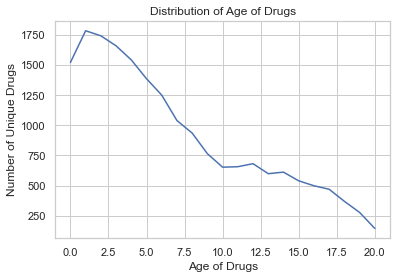

In [16]:
years_subset.groupby("years_since_approval")["NDA"].nunique().plot()
plt.ylabel("Number of Unique Drugs")
plt.xlabel("Age of Drugs")
plt.title("Distribution of Age of Drugs")

In [17]:
mean_rate = [[],[],[],[]]

for index, age_of_drug in enumerate([3,5,7, 10]):
    unique_NDA_list = years_subset[years_subset["years_since_approval"]==age_of_drug]["NDA"].unique()
    for age in range(age_of_drug+1):
        years_age = years_subset[years_subset["years_since_approval"]==age]
        years_age_NDA = years_age[years_age["NDA"].isin(unique_NDA_list)]
        #print(years_age_NDA.shape)
        mean_rate[index].append(years_age_NDA["adverse_affects_rate"].mean())

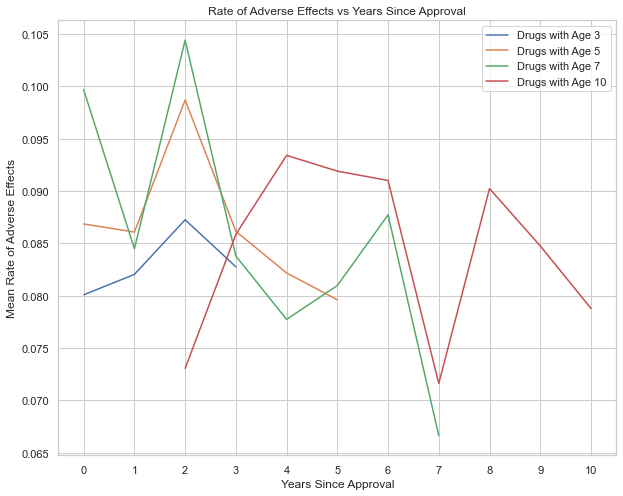

In [18]:
plt.figure(figsize = (10,8))
plt.plot(range(4), mean_rate[0], label="Drugs with Age 3")
plt.plot(range(6), mean_rate[1], label="Drugs with Age 5")
plt.plot(range(8), mean_rate[2], label="Drugs with Age 7")
plt.plot(range(11), mean_rate[3], label="Drugs with Age 10")
#plt.plot(range(16), mean_rate[3], label="Drugs with Age 15")
#plt.plot(range(21), mean_rate[4], label="Drugs with Age 20")
plt.title("Rate of Adverse Effects vs Years Since Approval")
plt.xlabel("Years Since Approval")
plt.ylabel("Mean Rate of Adverse Effects")
plt.xticks(range(11))
plt.legend()
plt.show()